In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [49]:
def correlacion_pearson(data_frame, columna1, columna2):
    return np.corrcoef(data_frame[columna1], data_frame[columna2])[0,1];

def podar(arr, percent):
    n = len(arr)
    k = int(round(n*(float(percent)/100)/2))
    return arr[k+1:n-k]

# Experimentos del TP de Subset Sum
En esta carpeta de Jupyer vamos a poner lo relativo a realizar la experimentación computacional.
- **Asegurarse de correr los experimentos en el notebook Experimentos antes de utilizar este notebook.**
- En este archivo se lee el output de los experimentos y se muestra de manera gráfica esos resultados.

# Datasets
Para los experimentos se crean las siguientes familias de instancias para evaluar los distintos métodos.
1. **densidad-alta**: Son instancias con n = 1..200 y con densidad alta, es decir, los números de S son altos en comparación con W.
2. **densidad-baja**: Son instancias con n = 1..200 y con densidad baja, o sea, se necesitan muchos números de S para sumar W.
3. **mejor-caso-BT**: Instancias de mejor caso para el algoritmo de BT con podas.
4. **peor-caso-BT**: Instancias de peor caos para el algoritmo de BT con podas.
5. **dinamica**: Instancias con n y w variando para probar el algoritmo de PD.

# Métodos
Los métodos evaluados en este notebook son los siguientes:
- **FB**: Fuerza Bruta.
- **BT**: Backtracking con podas por optimalidad y factibilidad.
- **BT-F**: Backtracking solamente con poda por factibilidad.
- **BT-B**: Backtracking solamente con poda por optimalidad.
- **DP**: Programación dinámica.

# Experimentos
Leemos el dataframe con todos los resultados.

In [36]:
df_resultados = pd.read_csv("resultados/resultado.csv");
df_optimos = pd.read_csv("optimos.csv");
optimos = df_optimos.set_index('instancia').T.to_dict('list')
df_resultados.head()

,instancia,metodo,tiempo,tamaño,costo
0,gr17,H-CG,0.019607,17,4763
1,a280,H-CG,3.612660,280,4150
2,att48,H-CG,0.130747,48,50306
3,bayg29,H-CG,0.062039,29,5005
4,bays29,H-CG,0.046898,29,6193


HOLIIIIS ESTAMOS EN EL TP2
Preambulo propuesto por el sirio: mostrar gaps absolutos y relativos para goloso y AGM AISLADOS, sin compararlos
Primer experimento: Boxplot golosa vs. AGM, basicamente copiar el grafico que esta en la diapo 11 de la clase de eval. de heuristicas (y algo para comparar tiempo tambien) (esto es para argumentar pq usamos AGM en BL)
2do: agregar a lo que dijimos antes, los resultados de BL, para ver que mejora, y cuanto empeora en tiempo
3er: empezar a jugueteear con los params de tabu, teniendo a BL como referencia


NO OLVIDARSE DE LOS CASOS PATOLOGICOS (pal final)

## Experimento 1: Golosa vs AGM

In [54]:
# Graficamos los tiempos de ejecución de cada dataset en función de n.
bins = [-1, 20, 40, 60, 80, 100, 250, np.inf]
labels = ['20', '40','60','80','100','250', '500']

df_goloso = df_resultados[df_resultados["metodo"]=="H-CG"].copy();
df_agm = df_resultados[df_resultados["metodo"]=="H-AGM"].copy();

gaps_goloso = [(instancia_goloso['costo'] - optimos[instancia_goloso['instancia']][0]) / optimos[instancia_goloso['instancia']][0] * 100 for i, instancia_goloso in df_goloso.iterrows()]
gaps_agm = [(instancia_goloso['costo'] - optimos[instancia_goloso['instancia']][0]) / optimos[instancia_goloso['instancia']][0] * 100 for i, instancia_goloso in df_agm.iterrows()]

gaps_goloso = stats.trimboth(gaps_goloso, 0.05)
gaps_agm = stats.trimboth(gaps_agm, 0.05)


print('Mediana goloso:', np.median(gaps_goloso))
print('Mediana AGM:', np.median(gaps_agm))
print('Promedio goloso:',np.mean(gaps_goloso)) # Trim 10% at both ends
print('Promedio AGM:',np.mean(gaps_agm))
print('Varianza goloso:', np.var(gaps_goloso))
print('Varianza AGM:', np.var(gaps_agm))

#PONER EN FORMATO TABLITA DE LATEX
""" fig7, ax7 = plt.subplots()
ax7.set_title('Multiple Samples with Different sizes')
ax7.boxplot([gaps_goloso, gaps_agm], showfliers=False)

plt.show() """

Mediana goloso: 194.46348582787522
Mediana AGM: 35.10495113103066
Promedio goloso: 305.2520835547078
Promedio AGM: 34.36323416935361
Varianza goloso: 75216.93916928854
Varianza AGM: 51.48851020395873


" fig7, ax7 = plt.subplots()\nax7.set_title('Multiple Samples with Different sizes')\nax7.boxplot([gaps_goloso, gaps_agm], showfliers=False)\n\nplt.show() "

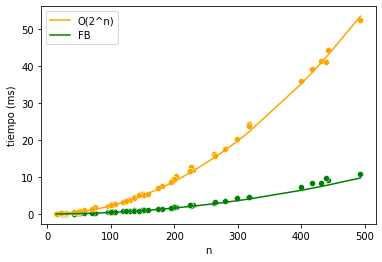

In [77]:
# Comparamos el dataset densidad-alta contra una función exponencial.
df_goloso = df_resultados[(df_resultados["metodo"]=="H-CG")].copy();
df_agm = df_resultados[(df_resultados["metodo"]=="H-AGM")].copy();
df_goloso['tiempo_esperado'] = df_goloso["tamaño"] ** 2 * 0.00004; # Exponencial
df_agm['tiempo_esperado'] = df_agm["tamaño"] ** 2 * 0.00022; # Exponencial
fig = sns.scatterplot(data=df_goloso, x='tamaño', y='tiempo', color="green");
fig = sns.scatterplot(data=df_agm, x='tamaño', y='tiempo', color="orange");
fig = sns.lineplot(data=df_agm, x='tamaño', y='tiempo_esperado', color="orange");
fig = sns.lineplot(data=df_goloso, x='tamaño', y='tiempo_esperado', color="green");
fig.legend(labels=['O(2^n)','FB']); # corregir esto
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/fb-complejidad.svg")

In [79]:
# Graficamos los tiempos de ejecución de cada dataset en función de n.
bins = [-1, 20, 40, 60, 80, 100, 250, np.inf]
labels = ['20', '40','60','80','100','250', '500']

df_goloso = df_resultados[df_resultados["metodo"]=="H-CG"].copy();
df_agm = df_resultados[df_resultados["metodo"]=="H-AGM"].copy();
df_bl = df_resultados[df_resultados["metodo"]=="BL"].copy();

gaps_goloso = [(instancia_goloso['costo'] - optimos[instancia_goloso['instancia']][0]) / optimos[instancia_goloso['instancia']][0] * 100 for i, instancia_goloso in df_goloso.iterrows()]
gaps_agm = [(instancia_goloso['costo'] - optimos[instancia_goloso['instancia']][0]) / optimos[instancia_goloso['instancia']][0] * 100 for i, instancia_goloso in df_agm.iterrows()]
gaps_bl = [(instancia_goloso['costo'] - optimos[instancia_goloso['instancia']][0]) / optimos[instancia_goloso['instancia']][0] * 100 for i, instancia_goloso in df_bl.iterrows()]

gaps_goloso = stats.trimboth(gaps_goloso, 0.05)
gaps_agm = stats.trimboth(gaps_agm, 0.05)
gaps_bl = stats.trimboth(gaps_bl, 0.05)


print('Mediana goloso:', np.median(gaps_goloso))
print('Mediana AGM:', np.median(gaps_agm))
print('Mediana Busqueda Local:', np.median(gaps_bl))
print('Promedio goloso:',np.mean(gaps_goloso)) # Trim 10% at both ends
print('Promedio AGM:',np.mean(gaps_agm))
print('Promedio Busqueda Local:',np.mean(gaps_bl))
print('Varianza goloso:', np.var(gaps_goloso))
print('Varianza AGM:', np.var(gaps_agm))
print('Varianza Busqueda Local:', np.var(gaps_bl))


Mediana goloso: 194.46348582787522
Mediana AGM: 35.10495113103066
Mediana Busqueda Local: 23.164851915143466
Promedio goloso: 305.2520835547078
Promedio AGM: 34.36323416935361
Promedio Busqueda Local: 23.036718975647812
Varianza goloso: 75216.93916928854
Varianza AGM: 51.48851020395873
Varianza Busqueda Local: 50.609078920814945


## Experimento 2: Complejidad de Backtracking
En este experimento evaluamos el método BT con los datasets mejor-caso-bt y peor-caso-bt. La hipótesis es que va a tener un comportamiento exponencial en el peor caso y lineal en el mejor caso.

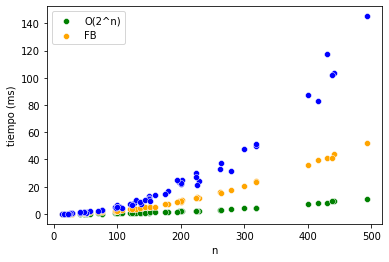

In [80]:
# Comparamos el dataset densidad-alta contra una función exponencial.
df_goloso = df_resultados[(df_resultados["metodo"]=="H-CG")].copy();
df_agm = df_resultados[(df_resultados["metodo"]=="H-AGM")].copy();
df_bl = df_resultados[(df_resultados["metodo"]=="BL")].copy();

fig = sns.scatterplot(data=df_goloso, x='tamaño', y='tiempo', color="green");
fig = sns.scatterplot(data=df_agm, x='tamaño', y='tiempo', color="orange");
fig = sns.scatterplot(data=df_bl, x='tamaño', y='tiempo', color="blue");
fig.legend(labels=['O(2^n)','FB']); # corregir esto
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/fb-complejidad.svg")

Índice de correlación de Pearson: 0.9910312582171574


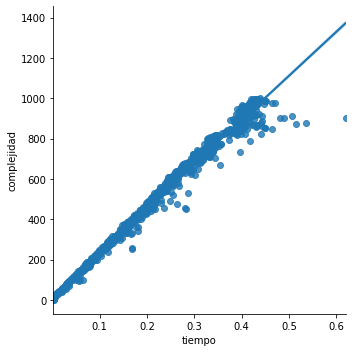

In [8]:
# Graficamos los tiempos de ejecución de la serie de instancias X1, ..., Xn vs la complejidad esperada.
df_BT_mejor_caso = df_resultados[(df_resultados["metodo"]=="BT") & (df_resultados["dataset"] == "mejor-caso-bt")].copy();
df_BT_mejor_caso["complejidad"] = df_BT_mejor_caso["n"];
fig = sns.lmplot(data=df_BT_mejor_caso, x="tiempo", y="complejidad");
plt.savefig("graficos/bt-correlacion-mejor-caso.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_BT_mejor_caso, "tiempo", "complejidad"));

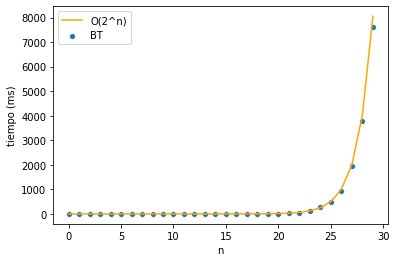

In [9]:
df_BT_peor_caso = df_resultados[(df_resultados["metodo"]=="BT") & (df_resultados["dataset"] == "peor-caso-bt")].copy();
df_BT_peor_caso["tiempo_esperado"] = 2 ** df_BT_peor_caso["n"] * 0.000015; # Exponencial.
fig = sns.scatterplot(data=df_BT_peor_caso, x='n', y='tiempo');
fig = sns.lineplot(data=df_BT_peor_caso, x='n', y='tiempo_esperado', color="orange");
fig.legend(labels=['O(2^n)','BT']);
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/bt-complejidad-peor-caso.svg");

Índice de correlación de Pearson: 0.9999714405658223


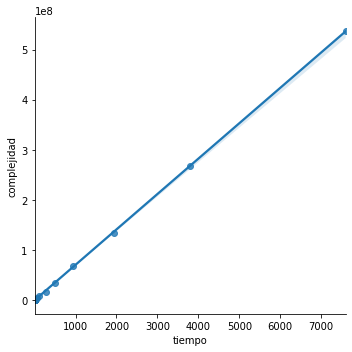

In [10]:
# Graficamos los tiempos de ejecución de la serie de instancias X1, ..., Xn vs la complejidad esperada.
df_BT_peor_caso = df_resultados[(df_resultados["metodo"]=="BT") & (df_resultados["dataset"] == "peor-caso-bt")].copy();
df_BT_peor_caso["complejidad"] = 2.0 ** df_BT_peor_caso["n"];
fig = sns.lmplot(data=df_BT_peor_caso, x="tiempo", y="complejidad");
plt.savefig("graficos/bt-correlacion-peor-caso.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_BT_peor_caso, "tiempo", "complejidad"));

## Experimento 3: Análisis de las podas
Analizar Backtracking con y sin las podas para distintas densidades.

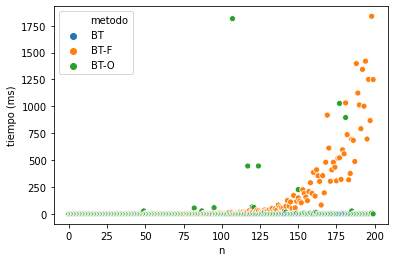

In [11]:
df_BT_densidad_alta = df_resultados[((df_resultados["metodo"]=="BT") | (df_resultados["metodo"]=="BT-F") | (df_resultados["metodo"]=="BT-O")) & (df_resultados["dataset"] == "densidad-alta")].copy();
df_BT_densidad_alta = df_BT_densidad_alta[df_BT_densidad_alta["tiempo"] < 2000]; # Sacamos outliers.
fig = sns.scatterplot(data=df_BT_densidad_alta, x='n', y='tiempo', hue='metodo');
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/bt-podas-alta.svg");

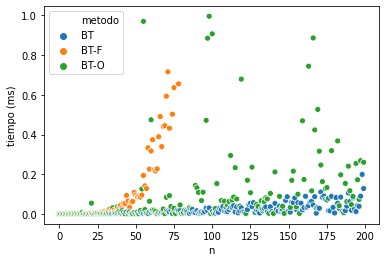

In [12]:
# Acercamos un poco la lupa para ver la diferencia entre BT y BT-O.
fig = sns.scatterplot(data=df_BT_densidad_alta[df_BT_densidad_alta["tiempo"]<1], x='n', y='tiempo', hue='metodo');
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/bt-podas-alta-zoom.svg");

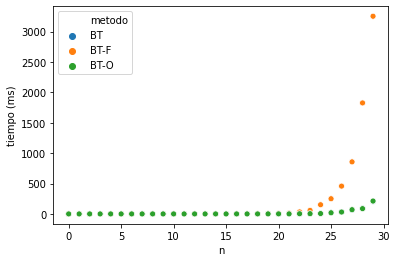

In [13]:
df_BT_densidad_baja = df_resultados[((df_resultados["metodo"]=="BT") | (df_resultados["metodo"]=="BT-F") | (df_resultados["metodo"]=="BT-O")) & (df_resultados["dataset"] == "densidad-baja")].copy();
fig = sns.scatterplot(data=df_BT_densidad_baja, x='n', y='tiempo', hue='metodo');
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/bt-podas-baja.svg");

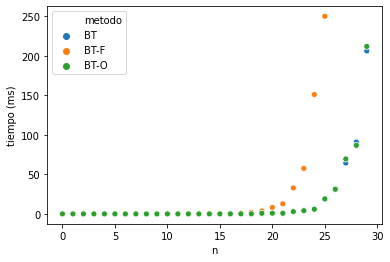

In [14]:
# Acercamos un poco la lupa para ver la diferencia entre BT y BT-O.
fig = sns.scatterplot(data=df_BT_densidad_baja[df_BT_densidad_baja["tiempo"]<400], x='n', y='tiempo', hue='metodo');
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/bt-podas-baja-zoom.svg");

# Experimento 4: Complejidad de programación dinámica
En este experimento analizamos el tiempo de ejecución real del algoritmo de programación dinámica y lo comparamos con su cota teórica para ver si en la práctica se comporta de manera similar.

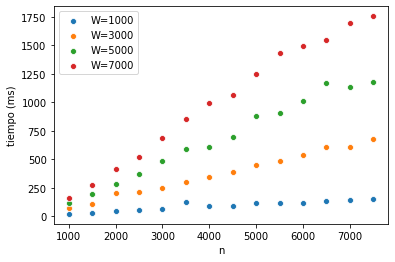

In [21]:
# Graficamos la evolución del tiempo de ejecución en función de n, con cortes en distintos W.
df_dinamica = df_resultados[(df_resultados["metodo"]=="DP") & (df_resultados["dataset"]=="dinamica")].copy();
fig = sns.scatterplot(data=df_dinamica[df_dinamica["W"]==1000], x='n', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["W"]==3000], x='n', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["W"]==5000], x='n', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["W"]==7000], x='n', y='tiempo');
fig.legend(labels=['W=1000','W=3000','W=5000','W=7000']);
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/dp-n.svg");

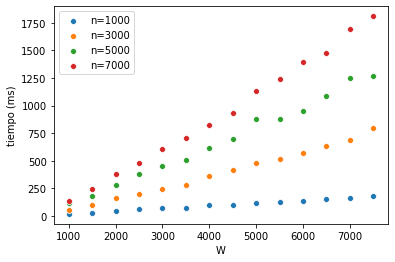

In [22]:
# Graficamos la evolución del tiempo de ejecución en función de W, con cortes en distintos n.
df_dinamica = df_resultados[(df_resultados["metodo"]=="DP") & (df_resultados["dataset"]=="dinamica")].copy();
fig = sns.scatterplot(data=df_dinamica[df_dinamica["n"]==1000], x='W', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["n"]==3000], x='W', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["n"]==5000], x='W', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["n"]==7000], x='W', y='tiempo');
fig.legend(labels=['n=1000','n=3000','n=5000','n=7000']);
fig.set(xlabel='W', ylabel='tiempo (ms)');
plt.savefig("graficos/dp-W.svg");

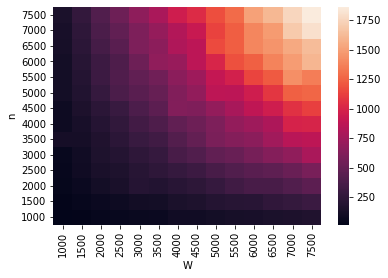

In [23]:
# Graficamos el tiempo de ejecución de las distintas instancias ordenadas por n y W.
df_dinamica = df_resultados[(df_resultados["metodo"]=="DP") & (df_resultados["dataset"]=="dinamica")].copy();
df_heatmap = df_dinamica.pivot_table(index='n', columns='W', values='tiempo', aggfunc=np.mean);
fig = sns.heatmap(df_heatmap);
fig.invert_yaxis();
plt.savefig("graficos/dp-heatmap.svg");

Índice de correlación de Pearson: 0.996037630053994


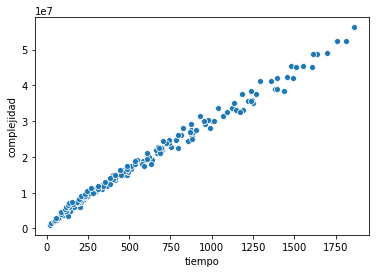

In [24]:
# Graficamos los tiempos de ejecución de la serie de instancias X1, ..., Xn vs la complejidad esperada.
df_dinamica = df_resultados[(df_resultados["metodo"]=="DP") & (df_resultados["dataset"]=="dinamica")].copy();
df_dinamica["complejidad"] = df_dinamica["n"] * df_dinamica["W"];
fig = sns.scatterplot(data=df_dinamica, x="tiempo", y="complejidad");
plt.savefig("graficos/dp-correlacion.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_dinamica, "tiempo", "complejidad"));

## Experimento 5: Comparación Backtacking y Programación Dinámica
En este experimento se trata de buscar para qué casos funciona mejor cada técnica. Por ejemplo, vamos a ejecutar BT y Dinámica sobre los datasets densidad-alta y densidad-baja.

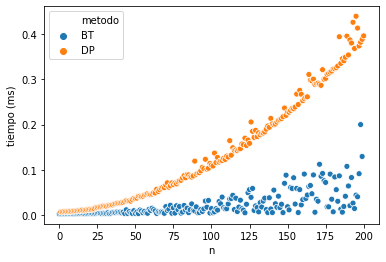

In [31]:
df_densidad_alta = df_resultados[((df_resultados["metodo"]=="BT") | (df_resultados["metodo"]=="DP")) & (df_resultados["dataset"] == "densidad-alta")].copy();
fig = sns.scatterplot(data=df_densidad_alta, x='n', y='tiempo', hue='metodo');
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/comparacion-bt-dp-alta.svg");

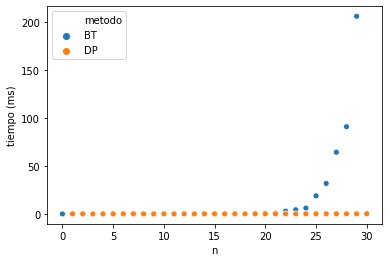

In [30]:
df_densidad_baja = df_resultados[((df_resultados["metodo"]=="BT") | (df_resultados["metodo"]=="DP")) & (df_resultados["dataset"] == "densidad-baja")].copy();
df_densidad_baja = df_densidad_baja[df_densidad_baja["n"]<=30];
fig = sns.scatterplot(data=df_densidad_baja, x='n', y='tiempo', hue='metodo');
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/comparacion-bt-dp-baja.svg");